69kV substation

Residentail	8699.960125

Commercial	1513.142271

Industrial	80.33114282




# Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#https://github.com/ZwEin27/Hierarchical-Clustering

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import sys
import math
import os
import heapq
import itertools
import matplotlib.pyplot as plt

In [ ]:
#Change the path here first
path='/content/drive/MyDrive/ACEP_Data_Team/Railbelt_line/Script_data/CSV_files/'

In [ ]:
#import industrial data for KNN clustering
ind_cent = pd.read_csv(path+'Industrial_divided/Central.csv', low_memory=False)
ind_gvea=pd.read_csv(path+'Industrial_divided/GVEA.csv', low_memory=False)

com_cent=pd.read_csv(path+'Commercial_divided/com_central.csv', low_memory=False)
com_gvea=pd.read_csv(path+'Commercial_divided/com_GVEA.csv', low_memory=False)

res_cent =pd.read_csv(path+'Res_Divided/res_central.csv', low_memory=False)
res_gvea =pd.read_csv(path+'Res_Divided/res_gvea.csv', low_memory=False)

df_list=[ind_cent,ind_gvea,com_cent,com_gvea,res_cent,res_gvea]
df_string=["ind_cent","ind_gvea","com_cent","com_gvea","res_cent","res_gvea"]
for ind in range(len(df_list)):
  df=df_list[ind]
  print(df_string[ind],len(df))

ind_cent 1025
ind_gvea 389
com_cent 21991
com_gvea 5775
res_cent 60632
res_gvea 3965


In [ ]:
#Dividing the datasets

# df_final_string=["com_central_1","com_central_2","com_central_3","com_gvea","res_central1","res_central2","res_central3","res_central4",
#                  "res_central5","res_central6","res_central7","res_central8","res_gvea"]

df_final_string=["com_central_1","com_central_2","com_central_3","com_central_4","res_central1","res_central2","res_central3","res_central4",
                 "res_central5","res_central6","res_central7","res_central8","res_central9","res_central10","res_central11"]

com_central_1=pd.read_csv(path+'Commercial_divided/Divided/com_central_1.csv', low_memory=False)
com_central_2=pd.read_csv(path+'Commercial_divided/Divided/com_central_2.csv', low_memory=False)
com_central_3=pd.read_csv(path+'Commercial_divided/Divided/com_central_3.csv', low_memory=False)
com_central_4=pd.read_csv(path+'Commercial_divided/Divided/com_central_4.csv', low_memory=False)
res_central1=pd.read_csv(path+'Res_Divided/Divided/res_central1.csv', low_memory=False)
res_central2=pd.read_csv(path+'Res_Divided/Divided/res_central2.csv', low_memory=False)
res_central3=pd.read_csv(path+'Res_Divided/Divided/res_central3.csv', low_memory=False)
res_central4=pd.read_csv(path+'Res_Divided/Divided/res_central4.csv', low_memory=False)
res_central5=pd.read_csv(path+'Res_Divided/Divided/res_central5.csv', low_memory=False)
res_central6=pd.read_csv(path+'Res_Divided/Divided/res_central6.csv', low_memory=False)
res_central7=pd.read_csv(path+'Res_Divided/Divided/res_central7.csv', low_memory=False)
res_central8=pd.read_csv(path+'Res_Divided/Divided/res_central8.csv', low_memory=False)
res_central9=pd.read_csv(path+'Res_Divided/Divided/res_central9.csv', low_memory=False)
res_central10=pd.read_csv(path+'Res_Divided/Divided/res_central10.csv', low_memory=False)
res_central11=pd.read_csv(path+'Res_Divided/Divided/res_central11.csv', low_memory=False)


# df_final_list=[com_central_1,com_central_2,com_central_3,com_gvea,res_central1,res_central2,res_central3,res_central4,res_central5,
#                res_central6,res_central7,res_central8,res_gvea]
# final_size_list=[1513,1513,1513,1513,8700,8700,8700,8700,8700,8700,8700,8700,8700]

df_final_list=[com_central_1,com_central_2,com_central_3,com_central_4,res_central1,res_central2,res_central3,res_central4,res_central5,
               res_central6,res_central7,res_central8,res_central9,res_central10,res_central11]
final_size_list=[1513,1513,1513,1513,8700,8700,8700,8700,8700,8700,8700,8700,8700,8700,8700]

for ind in range(len(df_final_list)):
  df=df_final_list[ind]
  print(df_final_string[ind],len(df))


com_central_1 6000
com_central_2 6000
com_central_3 6000
com_central_4 3991
res_central1 6000
res_central2 6000
res_central3 6000
res_central4 6000
res_central5 6000
res_central6 6000
res_central7 6000
res_central8 6000
res_central9 6000
res_central10 6000
res_central11 632



# Hierarchical Clustering From Scratch






## Hierarchical Clustering Functions


In [ ]:
class Hierarchical_Clustering:
    def __init__(self, ipt_data, max_size):
        self.input_file_name = ipt_data
        self.dataset = None
        self.dataset_size = 0
        self.dimension = 0
        self.cluster_max_size = max_size
        self.heap = []
        self.clusters = []
    

    def initialize(self):
        """
        Initialize and check parameters
        """
        # check file exist and if it's a file or dir
        # if not os.path.isfile(self.input_file_name):
        #     self.quit("Input file doesn't exist or it's not a file")

        self.dataset, self.clusters = self.load_data(self.input_file_name)
        self.dataset_size = len(self.dataset)

        if self.dataset_size == 0:
            self.quit("Input file doesn't include any data")

        self.dimension = len(self.dataset[0]["data"])

        if self.dimension == 0:
            self.quit("dimension for dataset cannot be zero")

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                      Hierarchical Clustering Functions                       """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    def euclidean_distance(self, data_point_one, data_point_two):
        """
        euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance
        assume that two data points have same dimension
        """
        size = len(data_point_one)
        result = 0.0
        for i in range(size):
            f1 = float(data_point_one[i])   # feature for data one
            f2 = float(data_point_two[i])   # feature for data two
            tmp = f1 - f2
            result += pow(tmp, 2)
        result = math.sqrt(result)
        return result

    def compute_pairwise_distance(self, dataset):
        result = []
        dataset_size = len(dataset)
        for i in range(dataset_size-1):    # ignore last i
            for j in range(i+1, dataset_size):     # ignore duplication
                dist = self.euclidean_distance(dataset[i]["data"], dataset[j]["data"])
                result.append( (dist, [dist, [[i], [j]]]) )

        return result
                
    def build_priority_queue(self, distance_list):
        heapq.heapify(distance_list)
        self.heap = distance_list
        return self.heap

    def compute_centroid_two_clusters(self, current_clusters, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for index in data_points_index:
            dim_data = current_clusters[str(index)]["centroid"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def compute_centroid(self, dataset, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for idx in data_points_index:
            dim_data = dataset[idx]["data"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def hierarchical_clustering(self):
        """
        Main Process for hierarchical clustering
        """
        dataset = self.dataset
        current_clusters = self.clusters
        old_clusters = []
        heap = self.compute_pairwise_distance(dataset)
        heap = self.build_priority_queue(heap)

        while True:
            dist, min_item = heapq.heappop(heap)
            if dist >= float('inf'):
                break
            # pair_dist = min_item[0]
            pair_data = min_item[1]
            # judge if include old cluster
            if not self.valid_heap_node(min_item, old_clusters):
                continue

            new_cluster = {}
            new_cluster_elements = sum(pair_data, [])

            if len(new_cluster_elements) > self.cluster_max_size:
                dist = float('inf')
                heapq.heappush(heap, (dist, [dist, pair_data]))
                continue
            new_cluster_cendroid = self.compute_centroid(dataset, new_cluster_elements)
            new_cluster_elements.sort()
            new_cluster.setdefault("centroid", new_cluster_cendroid)
            new_cluster.setdefault("elements", new_cluster_elements)
            for pair_item in pair_data:
                old_clusters.append(pair_item)
                del current_clusters[str(pair_item)]
            self.add_heap_entry(heap, new_cluster, current_clusters)
            current_clusters[str(new_cluster_elements)] = new_cluster
        return current_clusters
            
    def valid_heap_node(self, heap_node, old_clusters):
        pair_dist = heap_node[0]
        pair_data = heap_node[1]
        for old_cluster in old_clusters:
            if old_cluster in pair_data:
                return False
        return True
            
    def add_heap_entry(self, heap, new_cluster, current_clusters):
        for ex_cluster in current_clusters.values():
            new_heap_entry = []
            dist = self.euclidean_distance(ex_cluster["centroid"], new_cluster["centroid"])
            new_heap_entry.append(dist)
            new_heap_entry.append([new_cluster["elements"], ex_cluster["elements"]])
            heapq.heappush(heap, (dist, new_heap_entry))


    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                             Helper Functions                                 """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    def load_data(self, input_file):
        """
        load data and do some preparations
        """
        #input_file = open(input_file_name, 'rU')
        dataset = []
        clusters = {}
        id = 0
        for row in input_file:
            # line = line.strip('\n')
            # row = str(line)
            # row = row.split(",")
            iris_class =0

            data = {}
            data.setdefault("id", id)   # duplicate
            data.setdefault("data", row)
            data.setdefault("class", iris_class)
            dataset.append(data)

            clusters_key = str([id])
            clusters.setdefault(clusters_key, {})
            clusters[clusters_key].setdefault("centroid", row)
            clusters[clusters_key].setdefault("elements", [id])



            id += 1
        return dataset, clusters

    def quit(self, err_desc):
        raise SystemExit('\n'+ "PROGRAM EXIT: " + err_desc + ', please check your input' + '\n')

    def loaded_dataset(self):
        """
        use for test only
        """
        return self.dataset

    def display(self, current_clusters, dataset):
        colors = plt.cm.rainbow(np.linspace(0, 1, len(current_clusters)))
        plt.figure(figsize=(15,15))
        for ind, (_, clusterDict) in enumerate(current_clusters.items()):
            elems = clusterDict['elements']
            centroid = clusterDict['centroid']
            plt.scatter(dataset[elems][:, 0], dataset[elems][:, 1], color=colors[ind], marker='x', s=10)
        plt.legend()
        plt.show()

In [ ]:
#Plotting the Clusters
def display(current_clusters, dataset):
        colors = plt.cm.rainbow(np.linspace(0, 1, len(current_clusters)))
        plt.figure(figsize=(10,15))
        for ind, (_, clusterDict) in enumerate(current_clusters.items()):
            elems = clusterDict['elements']
            centroid = clusterDict['centroid']
            plt.scatter(dataset[elems][:, 0], dataset[elems][:, 1], color=colors[ind], marker='x', s=10, label=ind)
        plt.legend()
        plt.show()

In [ ]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""                               Main Method                                    """    
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
def MainMethod(X_input,size):
    """
    inputs:
    - ipt_data: a text file name for the input data
    - imax_size  Max size of cluster
    """
    ipt_data = X_input      # input data, e.g. iris.dat
    max_size = size       # Max size of cluster

    hc = Hierarchical_Clustering(ipt_data, max_size)
    hc.initialize()
    current_clusters = hc.hierarchical_clustering()
    return current_clusters

# Main Method 

In [ ]:
size_list=[80,80,1513,1513,8700,8700]
import time 
for ind in range(len(df_list)):
  starttime=time.time()
  df=df_list[ind]
  size=size_list[ind]
  X = df.values[:,:]
  print('Working on '+df_string[ind])
  current_clusters=MainMethod(X,size)
  outputText = ""
  for centr, valDict in current_clusters.items():
    outputText += 'Size:' + str(len(valDict['elements'])) + ' Centroid:' + str(valDict['centroid'][0]) + ' ' + str(valDict['centroid'][1]) + '\n'
    #print('Size:', len(valDict['elements']),'Centroid:', valDict['centroid'])
  with open('/content/drive/MyDrive/ACEP_Data_Team/Railbelt_line/Script_data/CSV_files/txt_output/'+df_string[ind]+'_output.txt', 'w') as f:
    f.write(outputText)
  print(time.time()-starttime)
print('!!!!Job finished!!!! Check output folder for TXT files')

Working on ind_cent


KeyboardInterrupt: ignored

# For divided datasets

In [ ]:
import time
for ind in range(len(df_final_list)):
  starttime=time.time()
  df=df_final_list[ind]
  size=final_size_list[ind]
  X = df.values[:,:]
  print('Working on '+df_final_string[ind])
  current_clusters=MainMethod(X,size)
  outputText = ""
  for centr, valDict in current_clusters.items():
    outputText += 'Size:' + str(len(valDict['elements'])) + ' Centroid:' + str(valDict['centroid'][0]) + ' ' + str(valDict['centroid'][1]) + '\n'
    #print('Size:', len(valDict['elements']),'Centroid:', valDict['centroid'])
  with open(path+'txt_output/'+df_final_string[ind]+'_output.txt', 'w') as f:
    f.write(outputText)
  print(time.time()-starttime)
print('!!!!Job finished!!!! Check output folder for TXT files')

Working on com_central_1


## Centroid Computation

In [ ]:
def individual_centroid(data,st):
  max_size=0
  X = data.values[:,:]
  hc = Hierarchical_Clustering(X, max_size)
  hc.initialize()
  centroid=hc.compute_centroid(hc.dataset,list(range(0,len(data))))
  outputText= 'Size:' + str(len(X)) + ' Centroid:' + str(centroid[0]) + ' ' + str(centroid[1]) + '\n'
  with open(path+'txt_output/Res_divided/'+st+'_output.txt', 'w') as f:
    f.write(outputText)
  print(st)
  print(outputText)

In [ ]:
res_div1_1=pd.read_csv(path+'Res_Divided/Divided_part2/Folder1/res_central_new1-1.csv', low_memory=False)
res_div1_2=pd.read_csv(path+'Res_Divided/Divided_part2/Folder1/res_central_new1-2.csv', low_memory=False)
res_div2_1=pd.read_csv(path+'Res_Divided/Divided_part2/Folder2/res_central_new2-1.csv', low_memory=False)
res_div2_2=pd.read_csv(path+'Res_Divided/Divided_part2/Folder2/res_central_new2-2.csv', low_memory=False)
res_div2_3=pd.read_csv(path+'Res_Divided/Divided_part2/Folder2/res_central_new2-3.csv', low_memory=False)
res_div2_4=pd.read_csv(path+'Res_Divided/Divided_part2/Folder2/res_central_new2-4.csv', low_memory=False)
res_div2_5=pd.read_csv(path+'Res_Divided/Divided_part2/Folder2/res_central_new2-5.csv', low_memory=False)
res_div3=pd.read_csv(path+'Res_Divided/Divided_part2/Folder3/res_central_new3.csv', low_memory=False)

In [ ]:
res_div_df=[res_div1_1,res_div1_2,res_div2_1,res_div2_2,res_div2_3,res_div2_4,res_div2_5,res_div3]
res_div_str=["res_div1_1","res_div1_2","res_div2_1","res_div2_2","res_div2_3","res_div2_4","res_div2_5","res_div3"]

for ind in range(len(res_div_df)):
  df=res_div_df[ind]
  individual_centroid(df,res_div_str[ind])

res_div1_1
Size:8700 Centroid:-149.1632107564713 61.60469004735634

res_div1_2
Size:6269 Centroid:-149.1680476426232 61.67659364273441

res_div2_1
Size:8700 Centroid:-149.84970701189675 61.165284185792885

res_div2_2
Size:8700 Centroid:-149.4251600863099 61.486117273367924

res_div2_3
Size:8700 Centroid:-149.25534175188528 61.56604816856322

res_div2_4
Size:8700 Centroid:-149.19720958660884 61.57910092106917

res_div2_5
Size:7081 Centroid:-149.2101135659939 61.59374546784348

res_div3
Size:3783 Centroid:-151.2616793602694 59.81795004427704



# Not Needed to go below this

In [ ]:
# X_cent = com_cent.values[:,:]
# X_gvea= com_gvea.values[:,:]

In [ ]:
#To take subset
# subset = ind.sample(n=500)
# X_sub=subset.values[:, 1:]

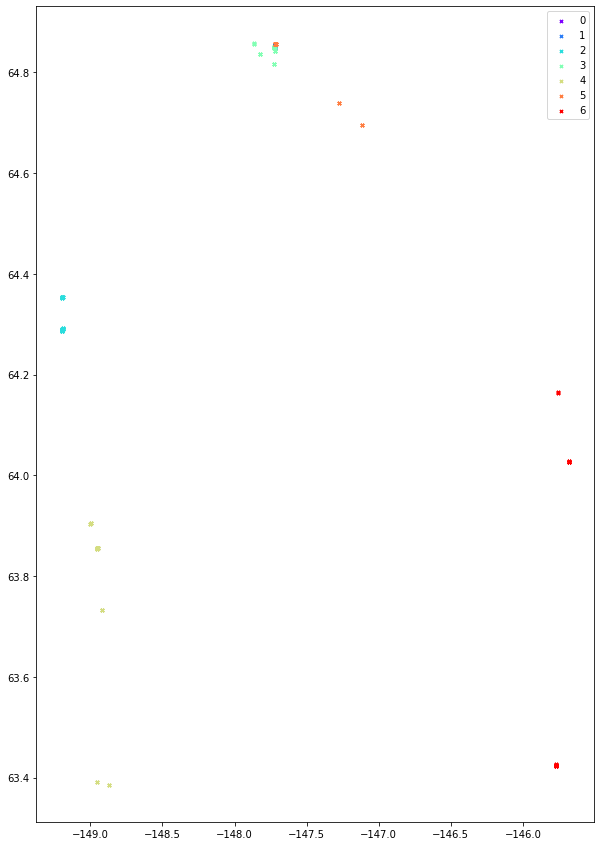

In [ ]:
display(current_clusters, ipt_data)

In [ ]:
outputText = ""
for centr, valDict in current_clusters.items():
  outputText += 'Size:' + str(len(valDict['elements'])) + ' Centroid:' + str(valDict['centroid'][0]) + ' ' + str(valDict['centroid'][1]) + '\n'
  print('Size:', len(valDict['elements']),'Centroid:', valDict['centroid'])

Size: 66 Centroid: [-147.72082348333333, 64.85040337121211]
Size: 51 Centroid: [-147.71916605490196, 64.85360104705882]
Size: 59 Centroid: [-149.19330426440678, 64.30990184745764]
Size: 67 Centroid: [-147.7422616910448, 64.84469662388058]
Size: 50 Centroid: [-148.95008265399994, 63.77549453799998]
Size: 50 Centroid: [-147.63302708000003, 64.833369648]
Size: 46 Centroid: [-145.7409995195652, 63.67229465652173]


In [ ]:

with open('/content/drive/MyDrive/ACEP_Data_Team/Railbelt_line/Script_data/CSV_files/txt_output/ind_gvea_output.txt', 'w') as f:
    f.write(outputText)

# Other methods

## Simple K Means

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
k =100

kmeans = KMeans(n_clusters=k)
a = kmeans.fit(X)
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print(np.unique(labels, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32), array([167, 762,  44,  46, 317, 270,  36,  36, 246,  74, 234,  97,  22,
        66,   6,  81,  19,  70,  59,  20,  36,  28,  20, 105, 156,  23,
         9,  19,   8,   5,  34,   8, 124,   8,  79,  29,  48,  14,  48,
        22,  24,  28,  14,  64,  14,  21, 216,  24,  15,   4,  14,  50,
        67,  12,   4,   4,   4,  86, 213,   4,  24, 114,  10,   4,  17,
       108,  50,  18,  10,   4,  12,   6,  16,   4,   4,  18,   4,  12,
        57,  97,  26, 187,  11,  19,  20,   8,  58,   6,   4,  58,  14,
        41,  43,  31,  27,  20, 

## Kmeans min max method

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 4.2 MB/s 


In [ ]:
def l2_distance(point1, point2):
    return sum([(float(i)-float(j))**2 for (i,j) in zip(point1, point2)])

class subproblem(object):
    def __init__(self, centroids, data, min_size, max_size):

        self.centroids = centroids
        self.data = data
        self.min_size = min_size
        self.max_size= max_size
        self.n = len(data)
        self.k = len(centroids)

        self.create_model()

    def create_model(self):
        def distances(assignment):
            return l2_distance(self.data[assignment[0]], self.centroids[assignment[1]])

        clusters = list(range(self.k))
        assignments = [(i, j)for i in range(self.n) for j in range(self.k)]

        # outflow variables for data nodes
        self.y = pulp.LpVariable.dicts('data-to-cluster assignments',
                                  assignments,
                                  lowBound=0,
                                  upBound=1,
                                  cat=pulp.LpInteger)

        # outflow variables for cluster nodes
        self.b = pulp.LpVariable.dicts('cluster outflows',
                                  clusters,
                                  lowBound=0,
                                  upBound=self.n-self.min_size,
                                  cat=pulp.LpContinuous)

        # create the model
        self.model = pulp.LpProblem("Model for assignment subproblem", pulp.LpMinimize)

        # objective function
        self.model += pulp.lpSum([distances(assignment) * self.y[assignment] for assignment in assignments])

        # flow balance constraints for data nodes
        for i in range(self.n):
            self.model += pulp.lpSum(self.y[(i, j)] for j in range(self.k)) == 1

        # flow balance constraints for cluster nodes
        for j in range(self.k):
            self.model += pulp.lpSum(self.y[(i, j)] for i in range(self.n)) - self.min_size == self.b[j]
            
        # capacity constraint on outflow of cluster nodes
        for j in range(self.k):
            self.model += self.b[j] <= self.max_size - self.min_size 

        # flow balance constraint for the sink node
        self.model += pulp.lpSum(self.b[j] for j in range(self.k)) == self.n - (self.k * self.min_size)


    def solve(self):
        self.status = self.model.solve()

        clusters = None
        if self.status == 1:
            clusters= [-1 for i in range(self.n)]
            for i in range(self.n):
                for j in range(self.k):
                    if self.y[(i, j)].value() > 0:
                        clusters[i] = j
        return clusters

def initialize_centers(dataset, k):
    ids = list(range(len(dataset)))
    random.shuffle(ids)
    return [dataset[id] for id in ids[:k]]

def compute_centers(clusters, dataset):
    # canonical labeling of clusters
    ids = list(set(clusters))
    c_to_id = dict()
    for j, c in enumerate(ids):
        c_to_id[c] = j
    for j, c in enumerate(clusters):
        clusters[j] = c_to_id[c]

    k = len(ids)
    dim = len(dataset[0])
    centers = [[0.0] * dim for i in range(k)]
    counts = [0] * k
    for j, c in enumerate(clusters):
        for i in range(dim):
            centers[c][i] += dataset[j][i]
        counts[c] += 1
    for j in range(k):
        for i in range(dim):
            centers[j][i] = centers[j][i]/float(counts[j])
    return clusters, centers

def minsize_kmeans(dataset, k, min_size=0, max_size=None):
    n = len(dataset)
    if max_size == None:
        max_size = n

    centers = initialize_centers(dataset, k)
    clusters = [-1] * n

    converged = False
    while not converged:
        m = subproblem(centers, dataset, min_size, max_size)
        clusters_ = m.solve()
        if not clusters_:
            return None, None
        clusters_, centers = compute_centers(clusters_, dataset)

        converged = True
        i = 0
        while converged and i < len(dataset):
            if clusters[i] != clusters_[i]:
                converged = False
            i += 1
        clusters = clusters_

    return clusters, centers

def read_data(datafile):
    data = []
    with open(datafile, 'r') as f:
        for line in f:
            line = line.strip()
            if line != '':
                d = [float(i) for i in line.split()]
                data.append(d)
    return data

def cluster_quality(cluster):
    if len(cluster) == 0:
        return 0.0

    quality = 0.0
    for i in range(len(cluster)):
        for j in range(i, len(cluster)):
            quality += l2_distance(cluster[i], cluster[j])
    return quality / len(cluster)

def compute_quality(data, cluster_indices):
    clusters = dict()
    for i, c in enumerate(cluster_indices):
        if c in clusters:
            clusters[c].append(data[i])
        else:
            clusters[c] = [data[i]]
    return sum(cluster_quality(c) for c in clusters.values())

   
    
    

In [ ]:
import pulp
import random

data = X
NUM_ITER = 2
k = 75
min_size = 0
max_size = 80
OUTFILE = None

best = None
best_clusters = None
for i in range(NUM_ITER):
    print(i)
    clusters, centers = minsize_kmeans(data, k, min_size, max_size)
    if clusters:
        quality = compute_quality(data, clusters)
        if not best or (quality < best):
            best = quality
            best_clusters = clusters
if best:
    if OUTFILE:
        with open(OUTFILE, 'w') as f:
            print('\n'.join(str(i) for i in best_clusters), file=f)
    else:
        print('cluster assignments:')
        for i in range(len(best_clusters)):
            print('%d: %d'%(i, best_clusters[i]))
    print('sum of squared distances: %.4f'%(best))
else:
    print('no clustering found')

0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


KeyboardInterrupt: ignored

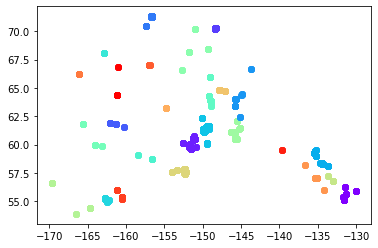

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.rainbow(np.linspace(0, 1, k))

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])

# plt.scatter(centroids[:, 0], marker = "x", s = 150, linewidths = 5, zorder = 10)
plt.show()

## Aglomerative Clustering


In [ ]:
subset = ind.sample(n=1000)
X_sub=subset.values[:, 1:]

NameError: ignored

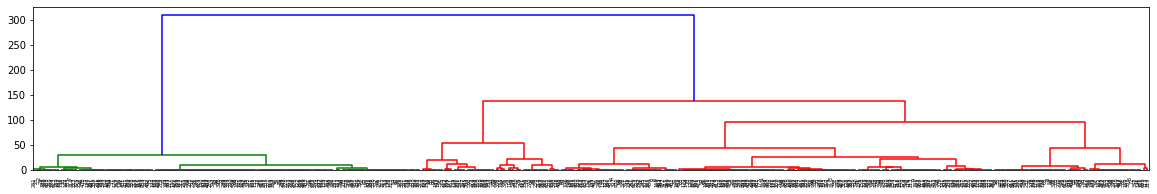

In [ ]:
import scipy.cluster.hierarchy as sch 
import matplotlib as plt
dendrogram=sch.dendrogram(sch.linkage(X_sub,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(X_sub)

In [ ]:
hc.children_

array([[159, 381],
       [394, 438],
       [164, 385],
       [ 28, 120],
       [ 37, 230],
       [ 72, 353],
       [342, 458],
       [184, 284],
       [300, 467],
       [ 51, 294],
       [171, 173],
       [  7, 314],
       [176, 267],
       [139, 362],
       [412, 426],
       [244, 297],
       [  2,  23],
       [ 89, 501],
       [ 12, 427],
       [260, 274],
       [268, 469],
       [113, 219],
       [  5, 505],
       [ 81, 500],
       [114, 213],
       [130, 421],
       [378, 407],
       [145, 211],
       [ 49, 249],
       [329, 440],
       [151, 477],
       [334, 383],
       [305, 430],
       [414, 488],
       [231, 498],
       [456, 479],
       [123, 349],
       [128, 425],
       [ 25, 516],
       [ 40, 408],
       [205, 295],
       [388, 523],
       [277, 525],
       [455, 496],
       [339, 529],
       [ 11, 527],
       [223, 375],
       [229, 510],
       [  3, 461],
       [ 68, 163],
       [ 43, 258],
       [ 15, 395],
       [246,